In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("dataset.csv",sep=";")

In [3]:
data["estado"].value_counts()

estado
A    418
R     49
Name: count, dtype: int64

In [4]:
Y=data["estado"].astype("category").cat.codes
Y.value_counts()

0    418
1     49
Name: count, dtype: int64

In [6]:
subconjunto=data[["estado","e0","e1","e2"]]

In [7]:
subconjunto

,estado,e0,e1,e2
0,R,0,0,0
1,R,0,0,0
2,R,0,0,0
3,R,0,0,0
4,R,0,0,0
...,...,...,...,...
462,A,1,1,0
463,A,1,1,0
464,A,1,0,0
465,A,1,1,0


In [8]:
pd.crosstab(data["estado"],data["e0"],normalize="index")

e0,0,1
estado,,
A,0.198565,0.801435
R,0.795918,0.204082


<Axes: xlabel='estado'>

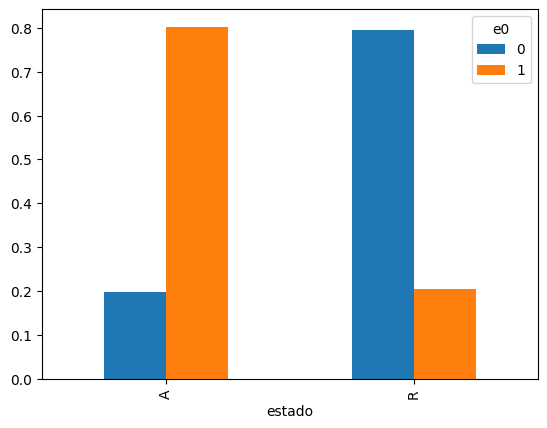

In [9]:
pd.crosstab(data["estado"],data["e0"],normalize="index").plot.bar()

<Axes: xlabel='estado'>

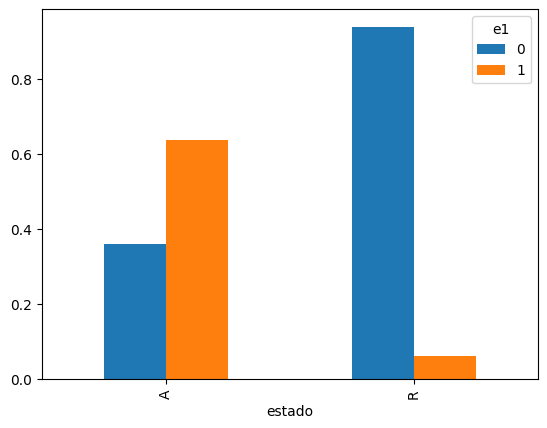

In [10]:
pd.crosstab(data["estado"],data["e1"],normalize="index").plot.bar()

<Axes: xlabel='estado'>

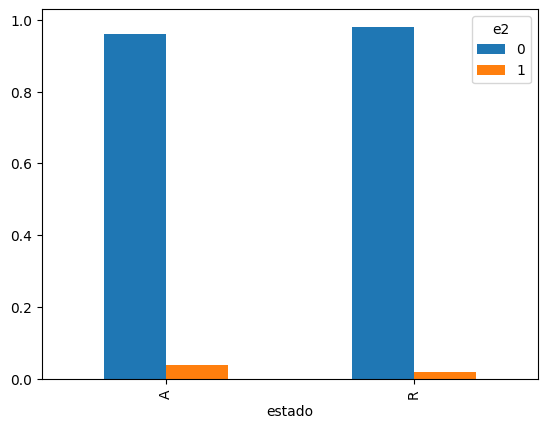

In [11]:
pd.crosstab(data["estado"],data["e2"],normalize="index").plot.bar()

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
X1=data[["e1","e2"]]

In [14]:
X1=X1.to_numpy()
Y=Y.to_numpy()
x_train1,x_test1,y_train,y_test=train_test_split(X1,Y,test_size=0.2,stratify=Y)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input
from keras.models import Sequential

2024-11-06 21:16:59.135820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
modelo1=Sequential()
modelo1.add(Input(shape=(2,)))
modelo1.add(Dense(16))
modelo1.add(Dense(8))
modelo1.add(Dense(1,activation="sigmoid"))
modelo1.compile(loss="binary_crossentropy",metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")])
modelo1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
modelo1.fit(x_train1,y_train,validation_data=(x_test1,y_test),epochs=8)

Epoch 1/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9026 - loss: 0.4616 - val_acc: 0.8936 - val_loss: 0.3953
Epoch 2/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9151 - loss: 0.3819 - val_acc: 0.8936 - val_loss: 0.3480
Epoch 3/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8890 - loss: 0.3446 - val_acc: 0.8936 - val_loss: 0.3133
Epoch 4/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9007 - loss: 0.2931 - val_acc: 0.8936 - val_loss: 0.2918
Epoch 5/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9091 - loss: 0.2844 - val_acc: 0.8936 - val_loss: 0.2777
Epoch 6/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9181 - loss: 0.2591 - val_acc: 0.8936 - val_loss: 0.2682
Epoch 7/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8854 - loss: 0.2911 - val_acc: 0.8936 - val_loss: 0.2632
Epoch 8/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9143 - loss: 0.2454 - val_acc: 0.8936 - val_loss: 0.2612


In [18]:
y_pred_probs=modelo1.predict(x_test1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [19]:
y_pred_probs

array([[0.02179848],
       [0.02179848],
       [0.2610154 ],
       [0.2610154 ],
       [0.08710631],
       [0.02179848],
       [0.2610154 ],
       [0.2610154 ],
       [0.02179848],
       [0.02179848],
       [0.2610154 ],
       [0.02179848],
       [0.2610154 ],
       [0.2610154 ],
       [0.2610154 ],
       [0.2610154 ],
       [0.2610154 ],
       [0.02179848],
       [0.08710631],
       [0.2610154 ],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.2610154 ],
       [0.2610154 ],
       [0.2610154 ],
       [0.2610154 ],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.2610154 ],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.2610154 ],
       [0.2610154 ],
       [0.2610154 ],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.02179848],
       [0.2610154 ],
       [0.261

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


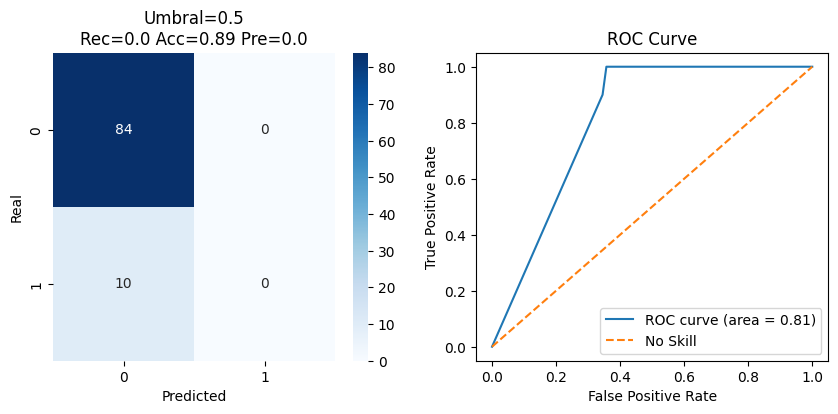

In [21]:
umbral=0.5

y_pred=y_pred_probs[:]>=umbral

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 4)

matriz = confusion_matrix(y_test, y_pred)    
ax=axes[0]
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_test, y_pred),2))+
        " Acc="+str(round(accuracy_score(y_test, y_pred),2))+
        " Pre="+str(round(precision_score(y_test, y_pred),2)))
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Real')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs) 
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], '--', label='No Skill')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

In [22]:
X2=data[["e1","e0"]]
X2=X2.to_numpy()
x_train2,x_test2,y_train,y_test=train_test_split(X2,Y,test_size=0.2,stratify=Y)

In [23]:
modelo2=Sequential()
modelo2.add(Input(shape=(2,)))
modelo2.add(Dense(16))
modelo2.add(Dense(8))
modelo2.add(Dense(1,activation="sigmoid"))
modelo2.compile(loss="binary_crossentropy",metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")])
modelo2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
modelo2.fit(x_train2,y_train,validation_data=(x_test2,y_test),epochs=8)

Epoch 1/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.2007 - loss: 0.9184 - val_acc: 0.3191 - val_loss: 0.6738
Epoch 2/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7345 - loss: 0.6208 - val_acc: 0.8404 - val_loss: 0.5211
Epoch 3/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8558 - loss: 0.4864 - val_acc: 0.8936 - val_loss: 0.4237
Epoch 4/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9181 - loss: 0.3814 - val_acc: 0.8936 - val_loss: 0.3630
Epoch 5/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8957 - loss: 0.3354 - val_acc: 0.8936 - val_loss: 0.3254
Epoch 6/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8809 - loss: 0.3054 - val_acc: 0.8936 - val_loss: 0.3037
Epoch 7/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8847 - loss: 0.2802 - val_acc: 0.8936 - val_loss: 0.2942
Epoch 8/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8820 - loss: 0.2758 - val_acc: 0.8936 - val_loss: 0.2905


In [25]:
y_pred_probs2=modelo2.predict(x_test2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


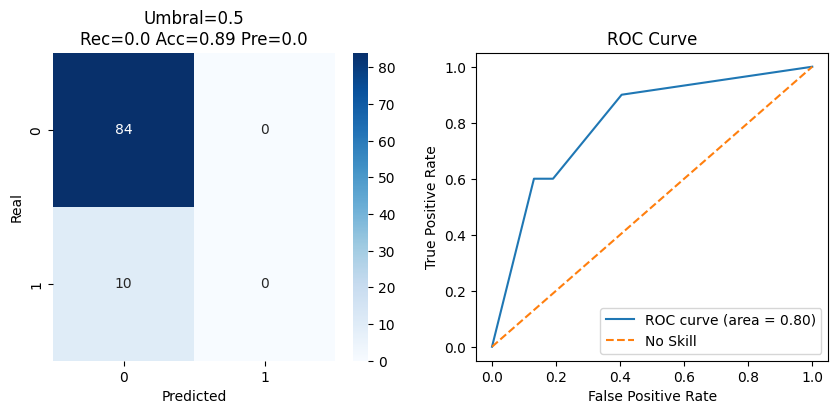

In [26]:
umbral=0.5

y_pred=y_pred_probs2[:]>=umbral

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 4)

matriz = confusion_matrix(y_test, y_pred)    
ax=axes[0]
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_test, y_pred),2))+
        " Acc="+str(round(accuracy_score(y_test, y_pred),2))+
        " Pre="+str(round(precision_score(y_test, y_pred),2)))
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Real')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs2) 
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], '--', label='No Skill')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

pip3 install imbalanced-learn

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
os=RandomOverSampler(random_state=1)
x_train2_o,y_train2_o=os.fit_resample(x_train2,y_train)

In [30]:
x_train2.shape

(373, 2)

In [31]:
x_train2_o.shape

(668, 2)

In [32]:
modelo3=Sequential()
modelo3.add(Input(shape=(2,)))
modelo3.add(Dense(16))
modelo3.add(Dense(8))
modelo3.add(Dense(1,activation="sigmoid"))
modelo3.compile(loss="binary_crossentropy",metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")])
modelo3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
modelo3.fit(x_train2_o,y_train2_o,validation_data=(x_test2,y_test),epochs=8)

Epoch 1/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.7776 - loss: 0.5820 - val_acc: 0.8404 - val_loss: 0.4074
Epoch 2/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8691 - loss: 0.5002 - val_acc: 0.8404 - val_loss: 0.3684
Epoch 3/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8466 - loss: 0.4644 - val_acc: 0.8404 - val_loss: 0.3582
Epoch 4/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8635 - loss: 0.4289 - val_acc: 0.8404 - val_loss: 0.3621
Epoch 5/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8580 - loss: 0.4033 - val_acc: 0.8404 - val_loss: 0.3784
Epoch 6/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8533 - loss: 0.4007 - val_acc: 0.8404 - val_loss: 0.3886
Epoch 7/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8460 - loss: 0.4097 - val_acc: 0.8404 - val_loss: 0.4007
Epoch 8/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8581 - loss: 0.3798 - val_acc: 0.8404 - val_loss: 0.4101


In [34]:
y_pred_probs3=modelo3.predict(x_test2)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x15473f880> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


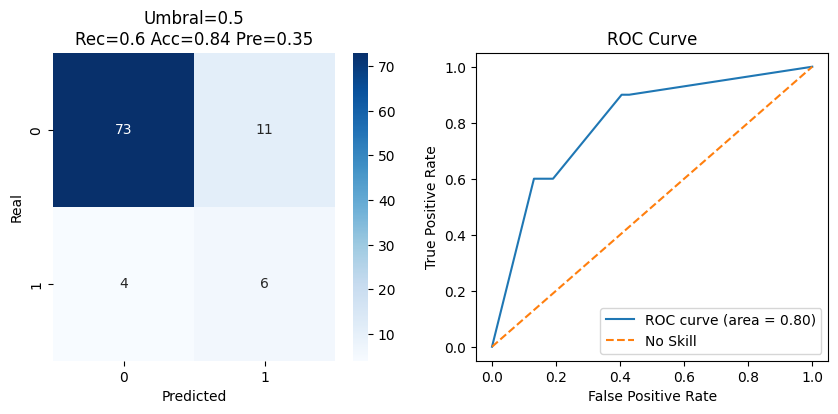

In [35]:
umbral=0.5

y_pred=y_pred_probs3[:]>=umbral

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 4)

matriz = confusion_matrix(y_test, y_pred)    
ax=axes[0]
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_test, y_pred),2))+
        " Acc="+str(round(accuracy_score(y_test, y_pred),2))+
        " Pre="+str(round(precision_score(y_test, y_pred),2)))
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Real')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs3) 
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], '--', label='No Skill')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

In [36]:
import keras_tuner
from keras_tuner.engine.hyperparameters import Choice

In [49]:
def build_model(hp):
    modelo=Sequential()
    modelo.add(Input(shape=(2,)))
    for i in range(hp.Choice("capas",[2,3])):
        modelo.add(Dense(hp.Choice("neuronas_capa",[8,16,32,64])))
    modelo.add(Dense(1,activation="sigmoid"))
    modelo.compile(loss="binary_crossentropy",metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")])
    return modelo

In [50]:
tuner=keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_acc",direction="max"),
    max_trials=32,
    executions_per_trial=2,
    overwrite=True,
    directory="modelos",
    project_name="reprobacion"
)

In [51]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
capas (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
neuronas_capa (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64], 'ordered': True}


In [52]:
tuner.search(x_train2_o,y_train2_o,epochs=8,validation_data=(x_test2,y_test))

Trial 8 Complete [00h 00m 03s]
val_acc: 0.8404255509376526

Best val_acc So Far: 0.8670212924480438
Total elapsed time: 00h 00m 26s


In [53]:
mejor_modelo=tuner.get_best_models()[0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [54]:
mejor_modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
y_pred_probs4=mejor_modelo.predict(x_test2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


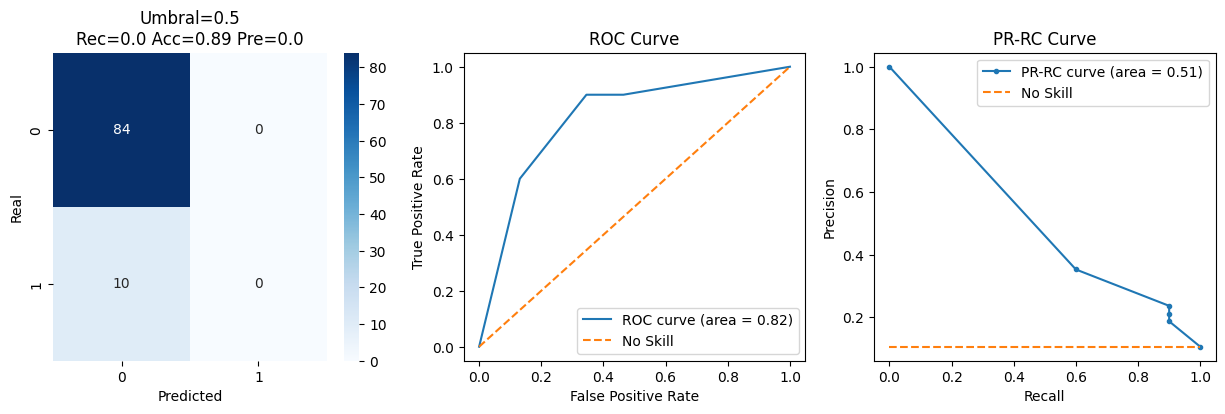

In [56]:
umbral=0.5

y_pred=y_pred_probs4[:]>=umbral

fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 4)

matriz = confusion_matrix(y_test, y_pred)    
ax=axes[0]
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_test, y_pred),2))+
        " Acc="+str(round(accuracy_score(y_test, y_pred),2))+
        " Pre="+str(round(precision_score(y_test, y_pred),2)))
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Real')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs4) 
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], '--', label='No Skill')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

lr_precision, lr_recall, thresholds_pr = precision_recall_curve(y_test, y_pred_probs4)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
axes[2].plot(lr_recall, lr_precision, marker='.', label='PR-RC curve (area = %0.2f)' % auc(lr_recall,lr_precision))
axes[2].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('PR-RC Curve')
axes[2].legend();

In [58]:
puntos=np.where(lr_precision>0.40)

In [61]:
lr_precision

array([0.10638298, 0.1875    , 0.20930233, 0.23684211, 0.35294118,
       1.        ])

In [62]:
lr_recall

array([1. , 0.9, 0.9, 0.9, 0.6, 0. ])

In [63]:
thresholds_pr

array([0.34302986, 0.34302992, 0.36271814, 0.46909234, 0.4906127 ],
      dtype=float32)

Text(33.22222222222222, 0.5, 'Real')

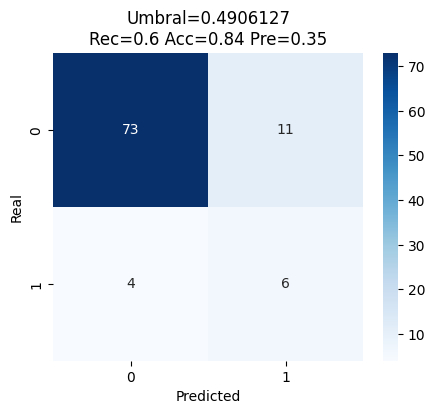

In [64]:
umbral=0.4906127

y_pred=y_pred_probs4[:]>=umbral

fig, axes = plt.subplots(1,1)
fig.set_size_inches(5, 4)

matriz = confusion_matrix(y_test, y_pred)    
ax=axes
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_test, y_pred),2))+
        " Acc="+str(round(accuracy_score(y_test, y_pred),2))+
        " Pre="+str(round(precision_score(y_test, y_pred),2)))
axes.set_xlabel('Predicted')
axes.set_ylabel('Real')